# **Global Thresholding**



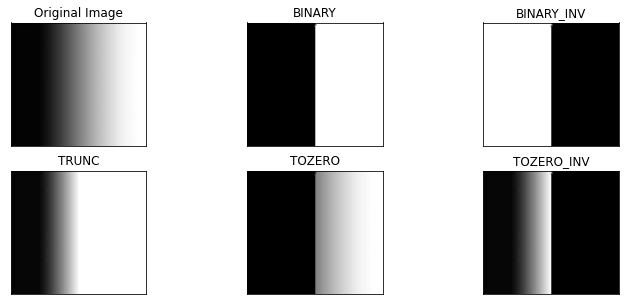

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Taking the file
img = cv2.imread('/content/drive/My Drive/Docencia/Patrones/Clases/Montadas/C3/gradients.jpg',0)

# Estimate different thresholding
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize= (12,5))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

## **...On an image**

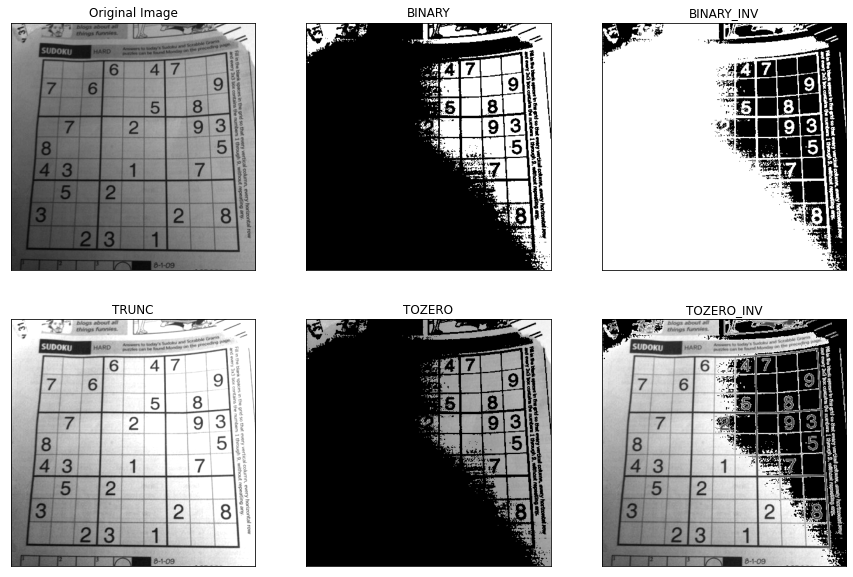

In [ ]:
image = cv2.imread('/content/drive/My Drive/Docencia/Patrones/Clases/Montadas/C3/sudoku4.jpg',0)
#image = cv2.medianBlur(image,5)

ret,thresh1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(image,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(image,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(image,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [image, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize= (15,10))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()


## **Adapting the thresh**

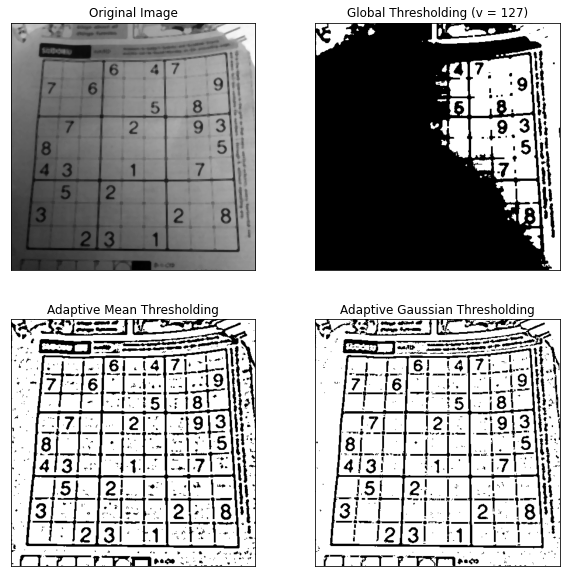

In [5]:
image = cv2.imread('/content/drive/My Drive/Docencia/Patrones/Clases/Montadas/C3/sudoku4.jpg',0)
image = cv2.medianBlur(image,5)

ret,th1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [image, th1, th2, th3]

plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

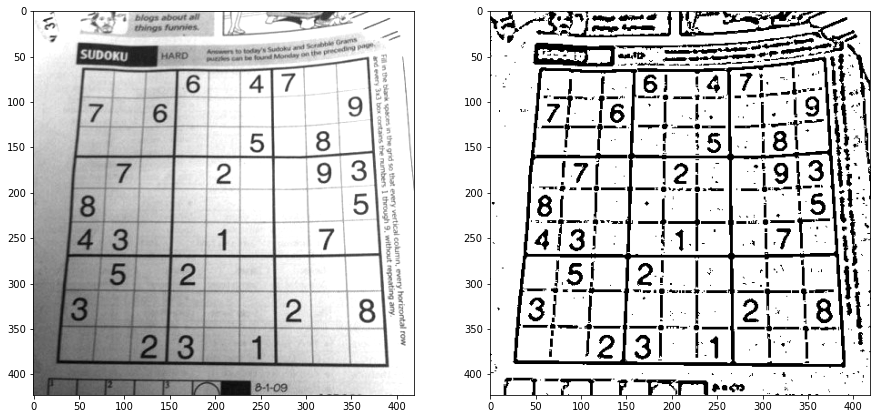

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15,10))
axes[0].imshow(thresh3, 'gray')
axes[1].imshow(th3, 'gray')

# **Otsu Thresholding**

In [7]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
img = cv.imread('/content/drive/My Drive/Docencia/Patrones/Clases/Montadas/C3/noisy2.png',0)

blur = cv.GaussianBlur(img,(5,5),0)

# find normalized_histogram, and its cumulative distribution function
hist = cv.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.sum()
Q = hist_norm.cumsum()
bins = np.arange(256)
fn_min = np.inf
thresh = -1

for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    if q1 < 1.e-6 or q2 < 1.e-6:
        continue
    b1,b2 = np.hsplit(bins,[i]) # weights
    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i

# find otsu's threshold value with OpenCV function
ret, otsu = cv.threshold(blur,0,255,cv.THRESH_BINARY + cv.THRESH_OTSU)
print( "Math = {} \nOpencv = {}".format(thresh,ret) )

Math = 118 
Opencv = 117.0


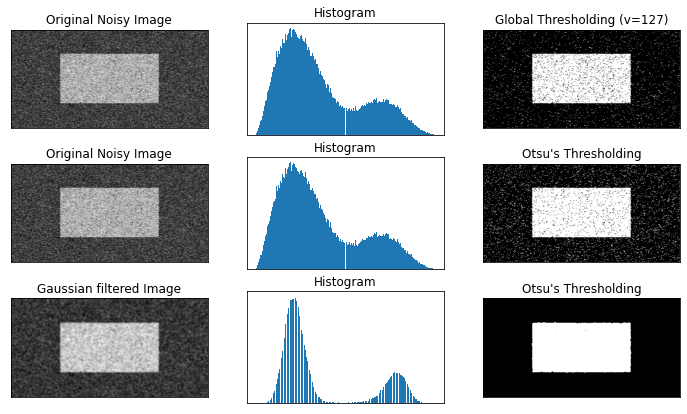

In [10]:
img = cv.imread('/content/drive/My Drive/Docencia/Patrones/Clases/Montadas/C3/noisy2.png',0)

# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(7,7),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY + cv.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]

titles = ['Original Noisy Image', 'Histogram', 'Global Thresholding (v=127)',
          'Original Noisy Image', 'Histogram', "Otsu's Thresholding",
          'Gaussian filtered Image', 'Histogram', "Otsu's Thresholding"]

fig, axes = plt.subplots(3, 3, figsize = (12,7))
axes[0, 0].set_title(titles[0])
axes[0, 1].set_title(titles[1])
axes[0, 2].set_title(titles[2])

for i in range(3):
    axes[i, 0].imshow(images[i*3], cmap = 'gray')
    axes[i, 0].set_title(titles[i*3+0]), axes[i, 0].set_xticks([]), axes[i, 0].set_yticks([])
    axes[i, 1].hist(images[i*3].ravel(),256)
    axes[i, 1].set_title(titles[i*3+1]), axes[i, 1].set_xticks([]), axes[i, 1].set_yticks([])
    axes[i, 2].imshow(images[i*3+2], cmap = 'gray')
    axes[i, 2].set_title(titles[i*3+2]), axes[i, 2].set_xticks([]), axes[i, 2].set_yticks([])

plt.show()